In [1]:
#!pip3 install ffmpeg

In [16]:
# Importando bibliotecas
from matplotlib.animation import PillowWriter
import matplotlib.animation as animation
from IPython.display import HTML, Image
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

In [17]:
# from matplotlib import interactive
# interactive(True)
%matplotlib notebook

In [18]:
# Definindo a função pendulo com valor de parâmetros padrão
def Pendulo(t, A = 1, f = 5, p = 0, d = 0.05):
    return (A*np.sin(2*np.pi*f*t + p)*np.exp(-d*t))

In [19]:
#Criando um array para t
t = np.linspace(0, 120*np.pi, 50000)

In [20]:
# Armazenando o tempo em matrizes
xt = np.zeros(len(t))
yt = np.zeros(len(t))
zt = np.zeros(len(t))

<IPython.core.display.Javascript object>


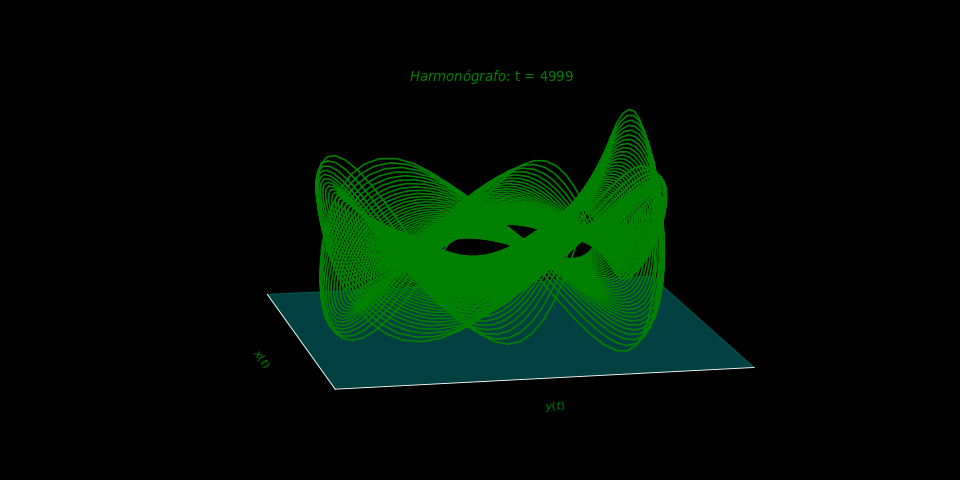

In [21]:
# Plotando os resultados
plt.style.use(['dark_background'])

fig = plt.figure(figsize = (12, 6), dpi = 80) #(12, 6); (12, 7); (14, 9)
ax = fig.add_subplot(projection = '3d')
ax.view_init(30, -10) #20,-20
fig.set_facecolor('k')
ax.set_facecolor('k')

# Planos transparentes
ax.w_xaxis.pane.fill = False
ax.w_yaxis.pane.fill = False
#ax.w_zaxis.pane.fill = False

# Planos transparentes ((0.0, 0.0, 0.0, 0.0))
ax.w_xaxis.set_pane_color((0.0, 0.5, 0.5, 0.0))
ax.w_yaxis.set_pane_color((0.0, 0.5, 0.5, 0.0))
ax.w_zaxis.set_pane_color((0.0, 0.5, 0.5, 0.5))

#plt.close(fig)

#Criando a animação
def update(i):
    xt[i] = Pendulo(t[i], 2, 4, -1, 0.05) + Pendulo(t[i], 1, 2, np.pi, 0.01)
    yt[i] = Pendulo(t[i], 4, 2, np.pi/4, 0.02) + Pendulo(t[i], 1, 2, -np.pi/2, 0.25) 
    zt[i] = Pendulo(t[i]) 
    ax.clear()
    ax.view_init(30, -10 + i/4)
    ax.plot(xt[:i], yt[:i], zt[:i], 'green')
    ax.set_title('$Harmonógrafo$: t = ' + str(i), color = 'g', fontsize = 12)
    ax.set_xlabel('$x(t)$', color = 'g', fontsize = 10)
    ax.set_ylabel('$y(t)$', color = 'g', fontsize = 10)
    #ax.set_zlabel('$z(t)$', color = 'g')
    
    # Removendo grid lines
    ax.grid(False)
    
    # Retirando os ticks
    ax.set_xticks([])
    ax.set_yticks([])
    ax.w_zaxis.line.set_lw(0.)
    ax.set_zticks([])
    
    # Removendo os tick labels
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.set_zticklabels([])

# Chamar a função update() periodicamente
ani = animation.FuncAnimation(fig, update, np.arange(5000), interval = 10, repeat = False)
#ani.save('jd.gif', writer = PillowWriter(fps = 100)) # Salvando no formato gif
#Image(url = 'jd.gif')
plt.show()

### Referências:

[Harmonograph 1](https://en.wikipedia.org/wiki/Harmonograph)

[Harmonograph 2](http://paulbourke.net/geometry/harmonograph/)